In [15]:
from unsuper import *
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt

import hdbscan

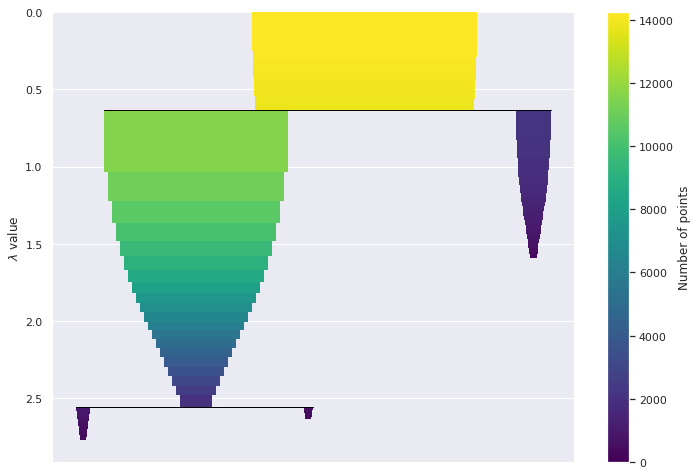

In [72]:
data = load_data(monte=False)
#X=data
#print(X.shape)
inputs_col = pd.DataFrame()

data['u-g']=data['u']-data['g']
data['g-r']=data['g']-data['r']
data['r-i']=data['r']-data['i']
data['i-z']=data['i']-data['z']
data['z-y']=data['z']-data['y']
data['u-G']=data['u']-data['G']
data['u-RP']=data['u']-data['RP']
data['u-BP']=data['u']-data['BP']

#X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()
#X = normalize(X_input)
X2 = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP',  'Teff', 'logg', 'feh']].copy()
X = data[['u-g', 'g-r', 'r-i', 'i-z', 'z-y', 'u-G', 'u-RP', 'u-BP']].copy()

X2_norm = normalize(X2)
X_norm = normalize(X)

N = int(0.025*X_norm.shape[0])

clusterer = hdbscan.HDBSCAN(min_cluster_size=N).fit(X_norm)

#print X_clust['labels']
clusterer.condensed_tree_.plot()
#clusterer.single_linkage_tree_.plot()

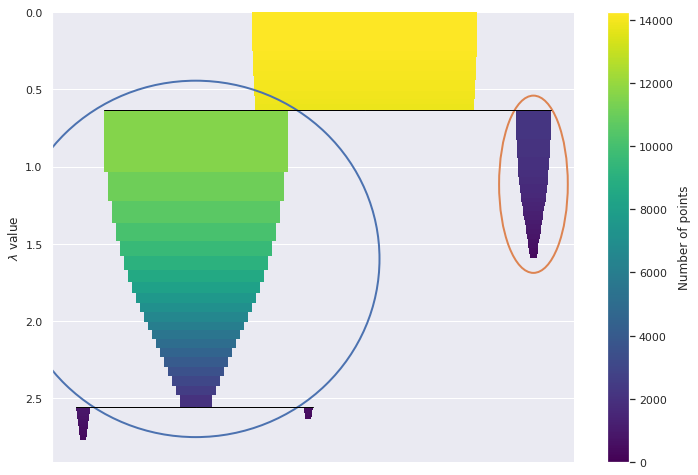

In [73]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

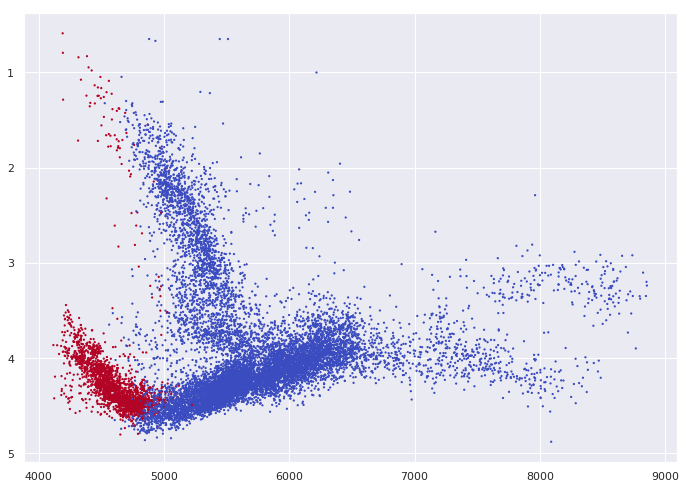

In [74]:
X_clust = X2.copy()

X_clust['labels'] = clusterer.labels_
X_clust['prob'] = clusterer.probabilities_
X_clust = X_clust[X_clust['labels']!=-1]
plt.scatter(X_clust['Teff'], X_clust['logg'], c=X_clust['labels'], s=1.5, cmap=plt.cm.coolwarm)
plt.gca().invert_yaxis()

[0, 1]


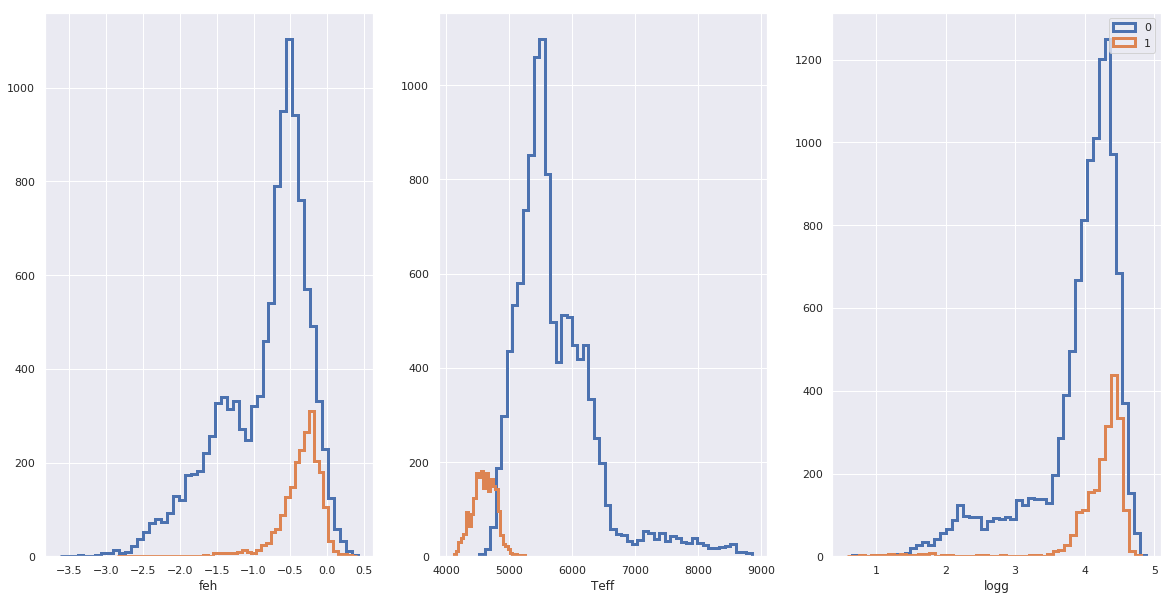

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))#, #sharey=True)
max_cluster = range(0, 2)
print max_cluster
for i in max_cluster:
    X_clust_label = X_clust.loc[X_clust['labels'] == i]
    sns.distplot(X_clust_label['feh'], kde=False,hist=True, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1}, ax=ax1, label=str(i))
    plt.legend()
    sns.distplot(X_clust_label['Teff'],kde=False, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1},ax=ax2, label=str(i))
    plt.legend()
    sns.distplot(X_clust_label['logg'],kde=False, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1}, ax=ax3, label=str(i))
    plt.legend()

In [75]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]

In [76]:
cluster_tree

,parent,child,lambda_val,child_size
444,14247,14248,0.636156,11629
445,14247,14249,0.636156,2174
12732,14248,14250,2.561245,928
12733,14248,14251,2.561245,589


In [96]:
X_new = X_clust[X_clust['labels']==0]
N_new = 5#int(0.001*X_new.shape[0])

clusterer_new = hdbscan.HDBSCAN(min_cluster_size=N).fit(X_new)
X_new['labels'] = clusterer_new.labels_
X_new['prob'] = clusterer_new.probabilities_

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


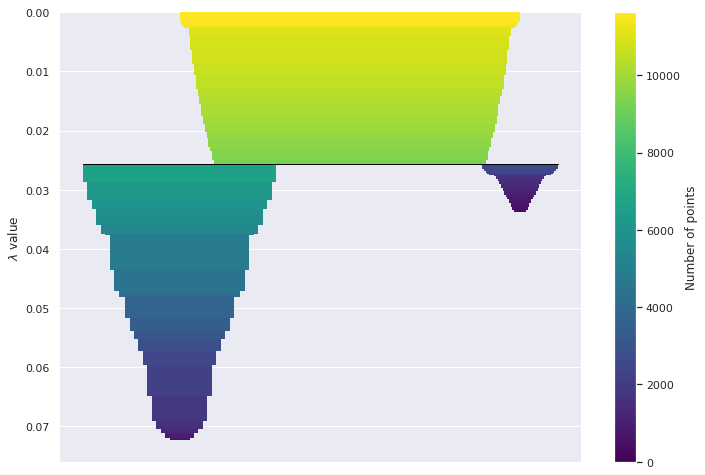

In [97]:
clusterer_new.condensed_tree_.plot()

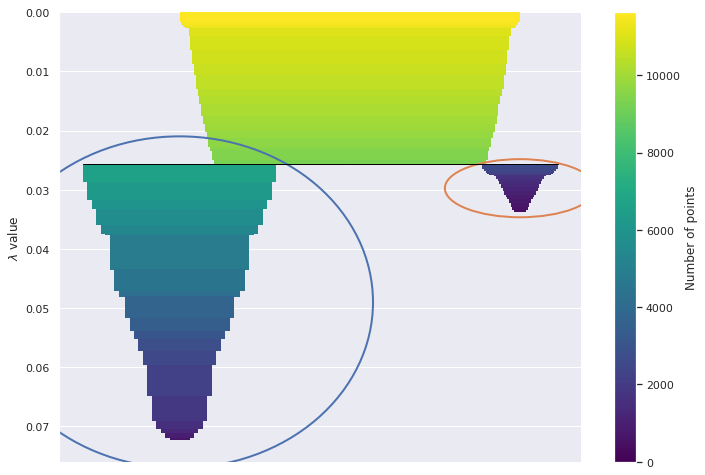

In [98]:
clusterer_new.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

[0, 1]


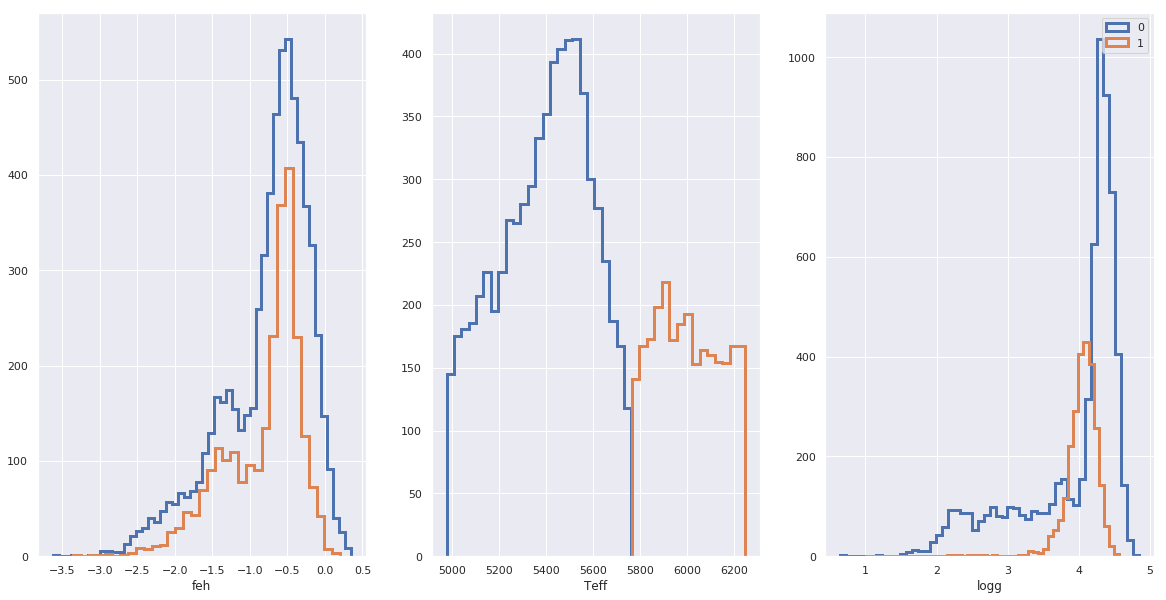

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,10))#, #sharey=True)
max_cluster = range(0, 2)
print max_cluster
for i in max_cluster:
    X_new_label = X_new.loc[X_new['labels'] == i]
    sns.distplot(X_new_label['feh'], kde=False,hist=True, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1}, ax=ax1, label=str(i))
    plt.legend()
    sns.distplot(X_new_label['Teff'],kde=False, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1},ax=ax2, label=str(i))
    plt.legend()
    sns.distplot(X_new_label['logg'],kde=False, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1}, ax=ax3, label=str(i))
    plt.legend()

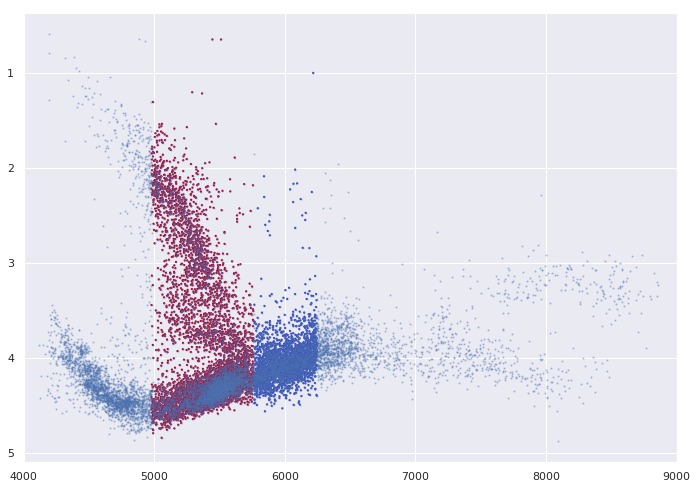

In [112]:
X_new = X_new[X_new['labels']!=-1]
plt.scatter(X_new['Teff'], X_new['logg'], c=X_new['labels'], s=1.5, cmap=plt.cm.coolwarm_r)
plt.scatter(X_clust['Teff'], X_clust['logg'], s=1.5, alpha=0.3)
plt.xlim(4000, 9000)
plt.gca().invert_yaxis()